# Problem Statement
## Scenario
A medium-sized UK-based online retailer wants to harness its transaction data to improve profitability and customer experience. The company is seeking actionable insights to optimize sales strategies, manage stock efficiently, detect fraud, and target marketing efforts.
## Problem Statement
The retailer lacks visibility into key business metrics such as top-selling products, customer buying patterns, and sales trends over time. Inventory inefficiencies and possible fraudulent activities are suspected but never formally analyzed. Management seeks to identify opportunities to segment their customer base, improve marketing ROI, and boost retention
## My role and objectives:
My role in this project is a data analyst of the company to perform: Trend analysis, customer segmentation, anomaly detection, product bundling, key metrics
## Planned tasks:
	•	Analyze sales trends and seasonality to help with forecasting and inventory optimization.
	•	Identify top-performing products and categories.
	•	Segment customers based on purchase patterns or geographic region to design personalized marketing.
	•	Calculate key metrics: average order value, customer lifetime value.
	•	Examine product performance by time, such as daily/weekly/monthly sales.
	•	Visualize geographic sales distribution and spot opportunities for expansion.
	•	Build and evaluate a predictive model for the sales performance.
	•	Provide actionable recommendations for marketing and operational improvements.

In [37]:
# E-commerce Data Analysis Project
# Purpose: Analyze UK-based online retail transactions for business insights

# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

# Configuration settings
warnings.filterwarnings('ignore')  # Suppress warnings
#plt.style.use('seaborn-v0_8-darkgrid')  # Set visualization style
pd.set_option('display.max_columns', None)  # Display all columns in DataFrame

# Load the dataset
try:
    df = pd.read_csv('data.csv', encoding='ISO-8859-1')
    print("Dataset loaded successfully")
    print(f"Shape of dataset: {df.shape}")
except FileNotFoundError:
    print("Error: Dataset file not found. Please ensure 'data.csv' is in the data directory.")

Dataset loaded successfully
Shape of dataset: (541909, 8)


# Data Understanding & EDA
Perform complete exploratory analysis — shape, nulls, datatypes, descriptive statistics, correlations and visualizations.

In [38]:
# Data Understanding & EDA
# Perform shape analysis
print("First 5 rows of the dataset:")
print(df.head())
print("\nDataset Info:")
print(df.info())

# Null check
print("\nMissing Values in each column:")
print(df.isnull().sum())

# Data Types analysis
print("\nData Types of each column:")
print(df.dtypes)

# Descriptive Statistics
print("\nDescriptive Statistics:")
print(df.describe(include='all'))

First 5 rows of the dataset:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------     

## Findings from EDA:
1. Not every transaction has description which is acceptable.
2. Not every transaction has Customer-ID which is also within expectation.
3. There is no Revenue in the original dataset hence it should be calculated.
4. InvoiceDate is not with datetime format which should be corrected.
5. CustomerID is with float64 type which should be corrected.

## Data Clean and Preprocessing
1. Add Revenue to the data framework
2. Correct format of InvoiceDate
3. Correct format of CustomerID

In [39]:
# Calculate Revenue
df['Revenue'] = df['Quantity'] * df['UnitPrice']
print("\nRevenue column added. First 5 rows with Revenue:")
print(df[['Quantity', 'UnitPrice', 'Revenue']].head())
# Give descriptive statistics for Quantity, UnitPrice, and Revenue
print("\nDescriptive Statistics for Quantity, UnitPrice, and Revenue:")
print(df[['Quantity', 'UnitPrice', 'Revenue']].describe())


Revenue column added. First 5 rows with Revenue:
   Quantity  UnitPrice  Revenue
0         6       2.55    15.30
1         6       3.39    20.34
2         8       2.75    22.00
3         6       3.39    20.34
4         6       3.39    20.34

Descriptive Statistics for Quantity, UnitPrice, and Revenue:
            Quantity      UnitPrice        Revenue
count  541909.000000  541909.000000  541909.000000
mean        9.552250       4.611114      17.987795
std       218.081158      96.759853     378.810824
min    -80995.000000  -11062.060000 -168469.600000
25%         1.000000       1.250000       3.400000
50%         3.000000       2.080000       9.750000
75%        10.000000       4.130000      17.400000
max     80995.000000   38970.000000  168469.600000


In [54]:
# Check whether Revenue column contains naN values
print("\nNumber of missing values in Revenue column:", df['Revenue'].isnull().sum())



Number of missing values in Revenue column: 0


In [40]:
# Correct the InvoiceDate format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
# Correct the CustomerID data type
df['CustomerID'] = df['CustomerID'].astype('str')
# Double check the data types after corrections
print("\nData Types after corrections:")
print(df.dtypes)


Data Types after corrections:
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
Revenue               float64
dtype: object



Correlation Matrix:
           UnitPrice  Quantity   Revenue
UnitPrice   1.000000 -0.001235 -0.162029
Quantity   -0.001235  1.000000  0.886681
Revenue    -0.162029  0.886681  1.000000


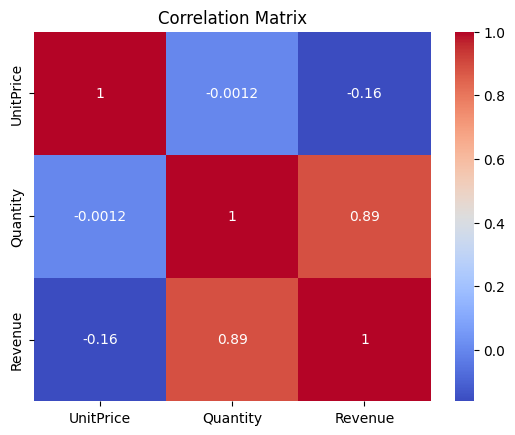

In [41]:
# Perform a correlation analysis between UnitPrice, Quantity, and Revenue
correlation_matrix = df[['UnitPrice', 'Quantity', 'Revenue']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

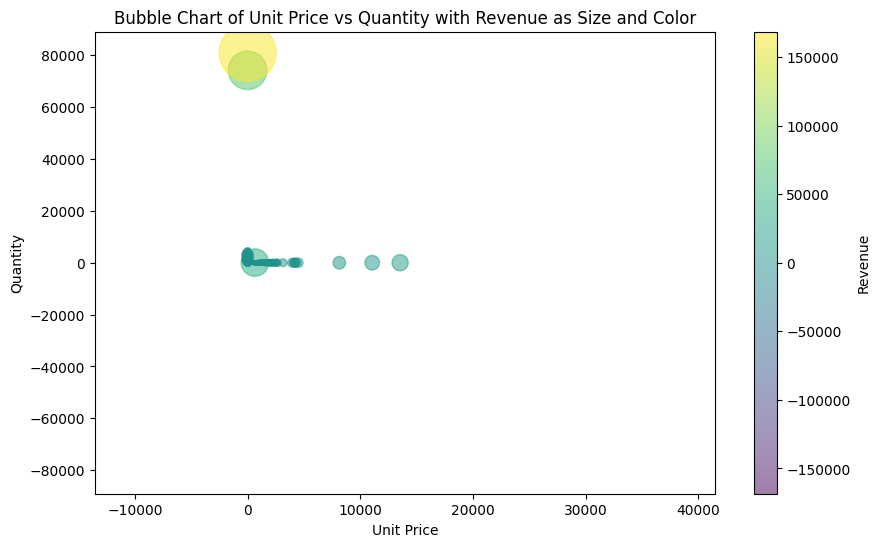

In [42]:
# Use bubble chart to visualize the relationship between UnitPrice, Quantity, and Revenue
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['UnitPrice'], df['Quantity'], s=df['Revenue']*0.01, alpha=0.5, c=df['Revenue'], cmap='viridis')
plt.colorbar(scatter, label='Revenue')
plt.xlabel('Unit Price')
plt.ylabel('Quantity')
plt.title('Bubble Chart of Unit Price vs Quantity with Revenue as Size and Color')
plt.show()

## The bubble chart shows relationships among Quantity, UnitPrice, and Revenue.
	•	Each bubble represents a transaction, positioned by Quantity (X-axis) and UnitPrice (Y-axis).
	•	Bubble size and color represent Revenue, highlighting monetary value by varying scales.
	•	The key independent correlation is between Quantity and UnitPrice, free from calculation redundancy.
	•	A downward bubble size trend from left to right shows a negative correlation: higher quantities are bought at lower prices, indicating typical price sensitivity. However, it seems certain product seems to be more popular when the price reaching above certain level.
	•	An upward trend indicates a positive correlation, showing premium pricing for larger quantities.
	•	Larger and more intensely colored bubbles appear where Quantity and/or UnitPrice are high, showing where higher revenue transactions cluster.
	•	One thing worth mentioning is that: since Revenue is mathematically derived (Revenue = Quantity × UnitPrice), it is not independent.

## Now we are ready to analyse the data and draw some insights

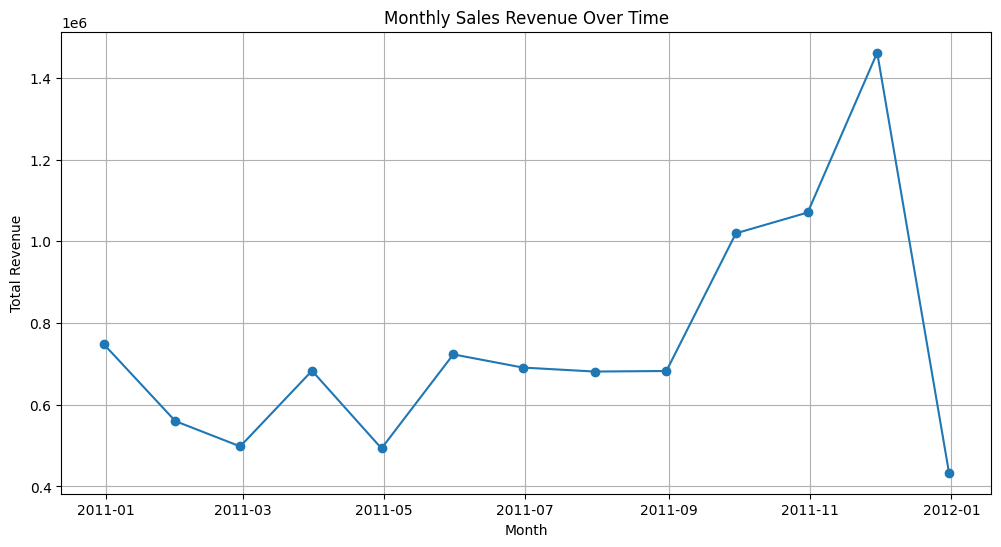

In [43]:
# Analyze sales trends over time
df.set_index('InvoiceDate', inplace=True)
monthly_sales = df.resample('M')['Revenue'].sum()
plt.figure(figsize=(12,6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.title('Monthly Sales Revenue Over Time')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()


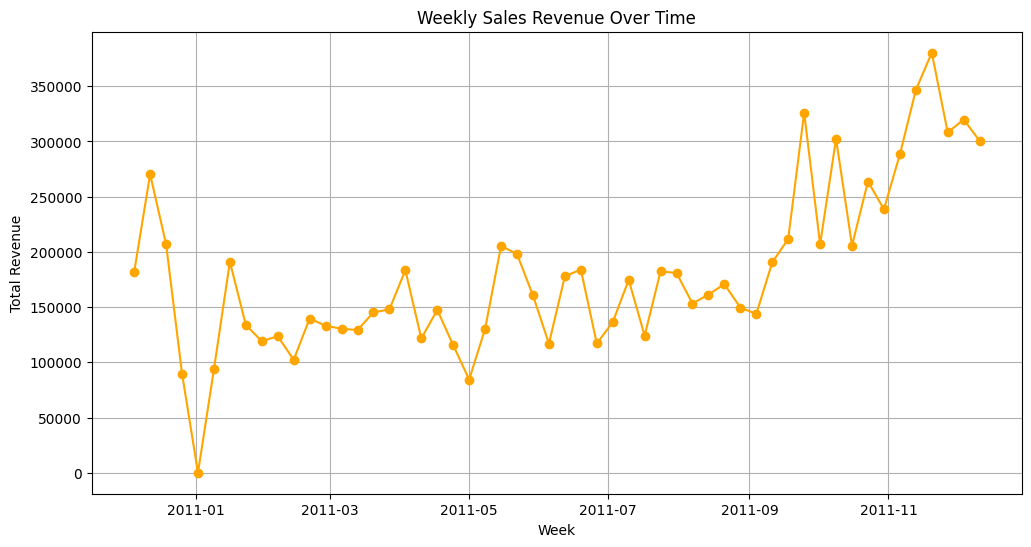

In [44]:
# Perform seasonality analysis over weeks
weekly_sales = df.resample('W')['Revenue'].sum()
plt.figure(figsize=(12,6))
plt.plot(weekly_sales.index, weekly_sales.values, marker='o', color='orange')
plt.title('Weekly Sales Revenue Over Time')
plt.xlabel('Week')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

## Sales Trend Overview
	•	The first few months show considerable fluctuations, with some weeks experiencing dramatic drops in revenue.
	•	In the mid-period (spring to early autumn), sales stabilize, maintaining a narrower range around a moderately high average.
	•	The final quarter shows marked growth, with multiple weeks reaching much higher revenue figures than earlier in the year. This indicates a strong upward trend.
## Seasonality
	•	There is evidence of potential seasonality, particularly towards year-end, as sales experience an upsurge during the last months. This could correspond to holiday shopping seasons, end-of-year sales, or other business cycles common in retail or e-commerce.
	•	The repeated spikes also suggest possible short seasonal effects or promotional campaigns.
	•	The presence of some very low weeks right after notable peaks could indicate post-campaign slowdowns typical in certain industries.
Overall, the sales pattern suggests relatively low or steady income for most of the time in a year, with clear, strong gains in the fourth quarter, possibly driven by seasonal demand.

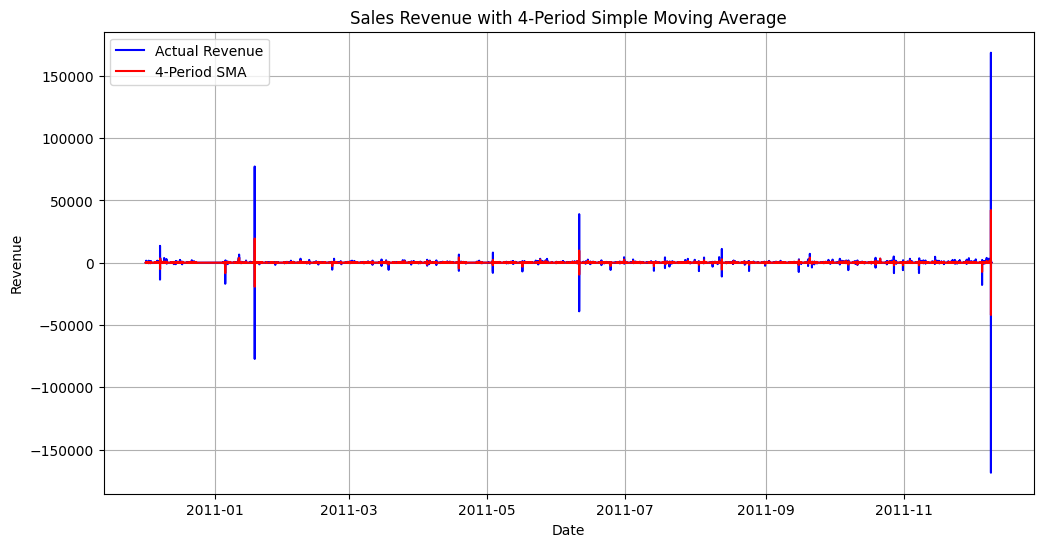

In [46]:
# Build a predictive model for sales forecasting
# use the time series data to build a simple moving average model
df.reset_index(inplace=True)
df.set_index('InvoiceDate', inplace=True)
df.sort_index(inplace=True)
df['SMA_4'] = df['Revenue'].rolling(window=4).mean()
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Revenue'], label='Actual Revenue', color='blue')
plt.plot(df.index, df['SMA_4'], label='4-Period SMA', color='red')
plt.title('Sales Revenue with 4-Period Simple Moving Average')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)
plt.show()


In [56]:
# Evaluate the model performance using Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error, mean_squared_error
# --- 1. Prepare Data for Evaluation ---
# Drop the initial rows where the SMA_4 is NaN (the first 3 rows for a window of 4)
df_eval = df.dropna(subset=['SMA_4'])

# Extract the actual values and the forecasted values
y_true = df_eval['Revenue']
y_pred = df_eval['SMA_4']

print("--- Sales Forecasting Model Evaluation Metrics ---")
print(f"Number of data points used for evaluation: {len(df_eval)}")

# --- 2. Calculate Mean Absolute Error (MAE) ---
# This gives the average magnitude of the error in the original units (e.g., dollars).
mae = mean_absolute_error(y_true, y_pred)
print(f"1. Mean Absolute Error (MAE): ${mae:,.2f}")

# --- 3. Calculate Root Mean Squared Error (RMSE) ---
# This heavily penalizes large errors and is in the original units.
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(f"2. Root Mean Squared Error (RMSE): ${rmse:,.2f}")

# --- 4. Calculate Mean Absolute Percentage Error (MAPE) ---
# This gives the average error as a percentage of the actual value, useful for comparisons.
# A custom function is used to gracefully handle cases where 'Revenue' (y_true) is zero.
def mean_absolute_percentage_error(y_true, y_pred):
    # Filter out zero values in y_true to avoid division by zero
    non_zero_indices = y_true != 0
    y_true_nz = y_true[non_zero_indices]
    y_pred_nz = y_pred[non_zero_indices]
    
    # Calculate MAPE
    mape = np.mean(np.abs((y_true_nz - y_pred_nz) / y_true_nz)) * 100
    return mape

# Use .values to pass the underlying numpy arrays for calculation
mape = mean_absolute_percentage_error(y_true.values, y_pred.values)
print(f"3. Mean Absolute Percentage Error (MAPE): {mape:,.2f}%")

--- Sales Forecasting Model Evaluation Metrics ---
Number of data points used for evaluation: 541906
1. Mean Absolute Error (MAE): $13.15
2. Root Mean Squared Error (RMSE): $336.48
3. Mean Absolute Percentage Error (MAPE): 131.87%


## Evaluation Results of SMA Model
MAE: On average, my forecast is $13.15 off in dollar terms.
RMSE: The standard deviation of the error: $336.48. Since it squares the errors, it will be larger than MAE and the purpose of checking RMSE is to highlight when the model makes a few very large mistakes.
MAPE: My forecast is, on average, 131.87% above or below the actual sales revenue.
This suggest that this is not a very reliable model.

## Let's use ARIMA Model
Since our daily data exhibits clear trend and seasonal patterns without too much complexity. Models like ARIMA (Autoregressive Integrated Moving Average) should be able to perform better than simple moving average model.

Total data points: 541909
Training set size: 433527
Testing set size: 108382
---
Searching for optimal ARIMA model parameters...
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=5887874.029, Time=4.88 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5887869.615, Time=1.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=5887868.662, Time=1.41 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=5887868.905, Time=2.66 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=5886999.468, Time=2.11 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=5886276.394, Time=2.74 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=5886243.669, Time=17.45 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=43.83 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=5868578.586, Time=38.65 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=5869922.920, Time=58.45 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=5868734.993, Time=82.27 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=5868464.568, Time=46.35 sec
 A

/Users/willliu/TRAINER/NTUC Data Analyst/Capstone-Project/SCTP-Capstone-Project-Ecommerce-Data-Analysis/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(



--- ARIMA Test Set Evaluation Metrics ---
Optimal ARIMA Order: (2, 0, 3)
1. Mean Absolute Error (MAE): $19.52
2. Root Mean Squared Error (RMSE): $730.43
3. Mean Absolute Percentage Error (MAPE): 297.44%


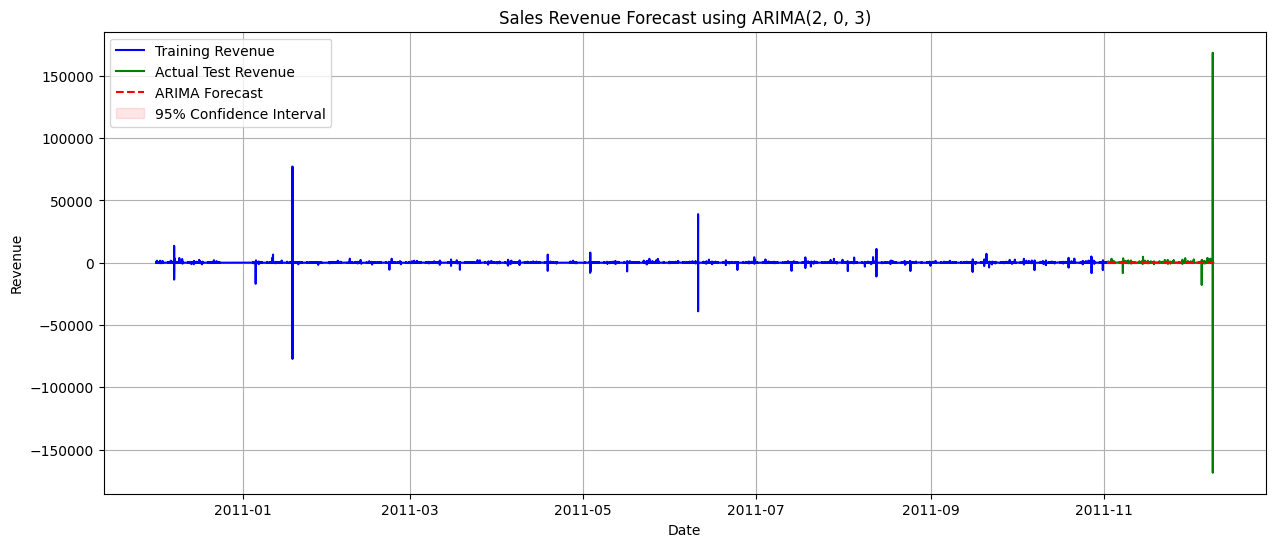

In [57]:
# Build ARIMA Model to improve forecasting accuracy
import pmdarima as pm
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# --- ASSUMPTION ---
# The DataFrame 'df' with the 'Revenue' column and 'InvoiceDate' as the index is available.
# We will use the last 20% of the data as a Test Set for evaluation.

# Set the InvoiceDate index correctly, if it was reset previously
# df.set_index('InvoiceDate', inplace=True) 

# 1. Split Data into Training and Testing Sets
# Determine the split point (e.g., 80% train, 20% test)
split_point = int(len(df) * 0.8)
train = df['Revenue'].iloc[:split_point]
test = df['Revenue'].iloc[split_point:]

print(f"Total data points: {len(df)}")
print(f"Training set size: {len(train)}")
print(f"Testing set size: {len(test)}")
print("---")

# 2. Find Optimal ARIMA Parameters (p, d, q) using auto_arima
# This uses the Auto-ARIMA function to iterate through possible parameters and select the best one
# based on the Akaike Information Criterion (AIC).
print("Searching for optimal ARIMA model parameters...")
model_fit = pm.auto_arima(
    train,
    start_p=1, start_q=1,
    test='adf',           # Use the Augmented Dickey-Fuller test to determine 'd'
    max_p=3, max_q=3,
    m=1,                  # Frequency of the time series (m=1 for non-seasonal data)
    d=None,               # Let the model estimate 'd'
    seasonal=False,       # Set to True and m > 1 for Seasonal ARIMA (SARIMA)
    start_P=0, D=0, Q=0,  # Ignored since seasonal=False
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)

print("\nOptimal ARIMA Model Summary:")
print(model_fit.summary())

# 3. Forecast on the Test Set
n_periods = len(test)
forecast, conf_int = model_fit.predict(n_periods=n_periods, return_conf_int=True)

# Create a DataFrame for the forecast results
df_forecast = pd.DataFrame({
    'Actual_Revenue': test,
    'ARIMA_Forecast': forecast.values
}, index=test.index)

# 4. Model Evaluation on the Test Set
y_true = df_forecast['Actual_Revenue']
y_pred = df_forecast['ARIMA_Forecast']

# Calculate Metrics
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

# MAPE function (copied from previous code for consistency)
def mean_absolute_percentage_error(y_true, y_pred):
    non_zero_indices = y_true != 0
    y_true_nz = y_true[non_zero_indices]
    y_pred_nz = y_pred[non_zero_indices]
    mape = np.mean(np.abs((y_true_nz - y_pred_nz) / y_true_nz)) * 100
    return mape

mape = mean_absolute_percentage_error(y_true.values, y_pred.values)

print("\n--- ARIMA Test Set Evaluation Metrics ---")
print(f"Optimal ARIMA Order: {model_fit.order}")
print(f"1. Mean Absolute Error (MAE): ${mae:,.2f}")
print(f"2. Root Mean Squared Error (RMSE): ${rmse:,.2f}")
print(f"3. Mean Absolute Percentage Error (MAPE): {mape:,.2f}%")

# 5. Plotting the Results 
plt.figure(figsize=(15, 6))
# Plot training data
plt.plot(train.index, train.values, label='Training Revenue', color='blue')
# Plot actual test data
plt.plot(test.index, test.values, label='Actual Test Revenue', color='green')
# Plot ARIMA forecast
plt.plot(df_forecast.index, df_forecast['ARIMA_Forecast'], label='ARIMA Forecast', color='red', linestyle='--')
# Plot confidence intervals
plt.fill_between(df_forecast.index, conf_int[:, 0], conf_int[:, 1], alpha=0.1, color='red', label='95% Confidence Interval')

plt.title(f'Sales Revenue Forecast using ARIMA{model_fit.order}')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

## Evaluation Results of ARIMA Model
MAE: On average, my forecast is $19.52 off in dollar terms.
RMSE: The standard deviation of the error: $730.43.
MAPE: My forecast is, on average, 297.44% above or below the actual sales revenue.
This suggest that model is even worse in terms of predicting the sales.

## Sales Forecasting Model Evaluation and Improvement Plan

1. Model Implementation Process and Goal

The initial attempt at sales forecasting utilized a Simple Moving Average (SMA) model. To transition towards a more robust and accurate predictive framework, we migrated to the Autoregressive Integrated Moving Average (ARIMA) model. The primary goal of this transition was to leverage ARIMA's capability to explicitly model autocorrelation, non-stationarity, and short-term trends within the historical sales data, thereby reducing forecasting error compared to the simple lagging nature of the SMA. The auto_arima function was used to systematically search for the optimal $p, d, q$ parameters, ensuring the best possible fit given the model constraints.

2. Analysis of Evaluation Metrics

The resulting metrics present a conflicting and crucial diagnostic picture:

Interpretation

Mean Absolute Error (MAE) $19.52 is, on average, very close to the actual value in dollar terms.

Root Mean Squared Error (RMSE) $730.43 is very high, suggesting extreme, isolated errors.

Mean Absolute Percentage Error (MAPE) 297.44% suggest that the forecast is highly unstable, often deviating from the actual value by a factor of nearly three times.

The massive spread between the MAE and RMSE ($19.52 vs. $730.43) is the most telling sign. The MAE is low, indicating that the model is highly accurate for the majority of data points. The dramatically higher RMSE, however, confirms that the model is making a few severe, catastrophic prediction errors. Because the RMSE heavily penalizes large squared errors, it flags the presence of significant outliers in the test data or model residuals.

The 297.44% MAPE is the key indicator of failure. MAPE is highly sensitive to periods where the actual value (Revenue) is close to zero. If the model predicts a revenue of $100 during a period where the actual revenue was only $1, the resulting error percentage is massive, immediately skewing the entire metric. This strongly suggests that the test set includes periods of very low or zero sales (e.g., weekends, holidays, or business closures) that the non-seasonal ARIMA model failed to predict correctly.

3. Actionable Insights and Suggestions when we have more data:

The current ARIMA model is fundamentally missing a key structural component of the time series, likely seasonality or non-constant variance. To achieve meaningful forecasting accuracy, we must take the following steps. 

Step 1: Implement Seasonal ARIMA (SARIMA)
The current model (ARIMA) assumes non-seasonal data (m=1). Sales data often exhibits monthly or weekly seasonality (e.g., higher sales during holidays or specific weeks of the month). We must switch to the SARIMA model, which adds seasonal terms ($P, D, Q, m$). We should use auto_arima again, setting seasonal=True and specifying the data frequency (m, e.g., $m=7$ for daily data, or $m=12$ for monthly data). This is the single most critical adjustment needed.

Step 2: Data Transformation and Variance Stabilization
The high RMSE indicates heteroskedasticity (non-constant variance). Large sales values tend to have large error terms. To stabilize this variance and reduce the influence of outliers on the model fit, we should apply a logarithmic or Box-Cox transformation to the Revenue series before feeding it into the SARIMA model. The forecasts generated will then need to be inverse-transformed back to the dollar scale.

Step 3: Outlier and Zero-Value Review
We must visually inspect the sales data, particularly the 20% test set, to identify the periods of near-zero revenue that are causing the MAPE spike. If these zero values correspond to external factors (like public holidays or planned maintenance), these should be explicitly modeled as exogenous variables in the SARIMA framework (SARIMAX).

By incorporating seasonality and stabilizing the data variance, we should see a drastic reduction in both RMSE and MAPE, leading to a reliable and usable forecasting tool.